In [118]:
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [119]:
datawine = load_wine()
datawine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [120]:
feature_names = datawine["feature_names"]
feature_names = np.asarray([feature_names])


In [121]:
feature_names.shape

(1, 13)

In [122]:
data = datawine["data"]
data = np.asarray(data)

In [123]:
data.shape

(178, 13)

In [124]:
data.dtype

dtype('float64')

In [125]:
feature_names.dtype

dtype('<U28')

In [126]:
X1 = pd.DataFrame(feature_names)

In [127]:
X2 = pd.DataFrame(data)


In [128]:
X = pd.concat([X1, X2])
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.4,3.91,2.48,23,102,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750
175,13.27,4.28,2.26,20,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20,120,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840


In [129]:
X.columns = X.iloc[0]
X = X[1:]
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
4,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.4,3.91,2.48,23,102,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750
175,13.27,4.28,2.26,20,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20,120,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840


In [130]:
target = datawine["target"]
target = np.asarray([target])

In [131]:
X3 = pd.DataFrame(target)
X4 = X3.T
X4 = X4.rename(columns={0: 'target'})


In [132]:
X6 = pd.concat([X, X4], axis=1)

In [133]:
for col in X6.columns:
    X6[col] = pd.to_numeric(X6[col],errors = 'raise')

In [134]:
X6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

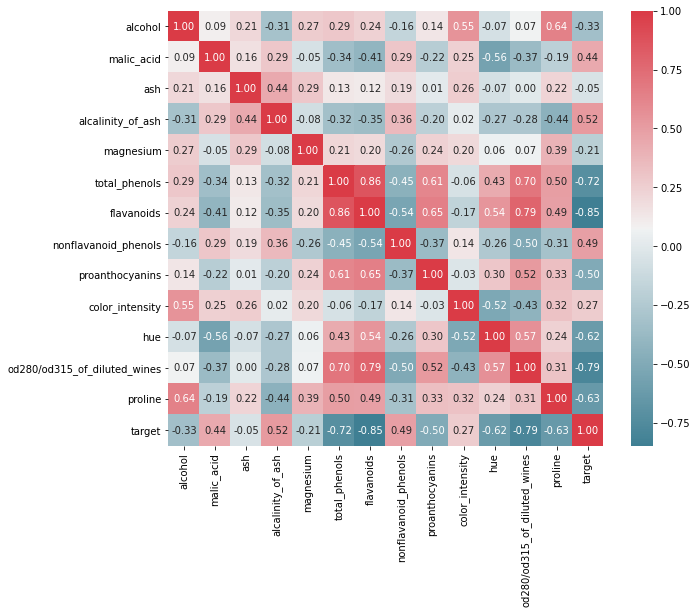

In [135]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
X_corr = X6.corr()
sns.heatmap(X_corr, annot=True, fmt=".2f", mask=np.zeros_like(X_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [136]:
X_corr = X_corr.drop(columns=['target'])

In [137]:
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [138]:
# X7 = X_corr[ X_corr.iloc[:,:]>= 0.5 ]

In [139]:
# X8 = X7[ X7.iloc[:,:] < 1 ]

In [140]:
X9 = X8.dropna(axis=0, how='all')


In [141]:
X10 = X9.dropna(axis=1, how='all')


In [142]:
X11 = X10.drop(["target"])


In [143]:
fnames = (list(X11.columns))
fnames


['alcohol',
 'alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [144]:
X_test = X
X_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
4,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.4,3.91,2.48,23,102,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750
175,13.27,4.28,2.26,20,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20,120,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840


In [146]:
xfsq = X_test[['alcohol',
 'alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']]
xfsq = xfsq ** 2
xfsq = xfsq.add_suffix('_2')


In [147]:
X_Result = pd.concat([X_test, xfsq], axis=1)
X_Result

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol_2,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,proanthocyanins_2,color_intensity_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,202.493,243.36,7.84,9.3636,5.2441,31.8096,1.0816,15.3664,1.13422e+06
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,174.24,125.44,7.0225,7.6176,1.6384,19.1844,1.1025,11.56,1.1025e+06
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,173.186,345.96,7.84,10.4976,7.8961,32.2624,1.0609,10.0489,1.40422e+06
3,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,206.497,282.24,14.8225,12.1801,4.7524,60.84,0.7396,11.9025,2.1904e+06
4,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,175.298,441,7.84,7.2361,3.3124,18.6624,1.0816,8.5849,540225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,187.964,420.25,2.8224,0.3721,1.1236,59.29,0.4096,3.0276,547600
174,13.4,3.91,2.48,23,102,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750,179.56,529,3.24,0.5625,1.9881,53.29,0.49,2.4336,562500
175,13.27,4.28,2.26,20,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,176.093,400,2.5281,0.4761,1.8225,104.04,0.3481,2.4336,697225
176,13.17,2.59,2.37,20,120,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840,173.449,400,2.7225,0.4624,2.1316,86.49,0.36,2.6244,705600


In [148]:
X.describe

<bound method NDFrame.describe of 0   alcohol malic_acid   ash  ...   hue od280/od315_of_diluted_wines proline
0     14.23       1.71  2.43  ...  1.04                         3.92    1065
1      13.2       1.78  2.14  ...  1.05                          3.4    1050
2     13.16       2.36  2.67  ...  1.03                         3.17    1185
3     14.37       1.95   2.5  ...  0.86                         3.45    1480
4     13.24       2.59  2.87  ...  1.04                         2.93     735
..      ...        ...   ...  ...   ...                          ...     ...
173   13.71       5.65  2.45  ...  0.64                         1.74     740
174    13.4       3.91  2.48  ...   0.7                         1.56     750
175   13.27       4.28  2.26  ...  0.59                         1.56     835
176   13.17       2.59  2.37  ...   0.6                         1.62     840
177   14.13        4.1  2.74  ...  0.61                          1.6     560

[178 rows x 13 columns]>